# Setup

In [1]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.appName("NYCTaxiAnalysis").getOrCreate()

# Read parquet files from HDFS
df = spark.read.parquet("hdfs:///nyc-tlc/raw-data/")
df.printSchema()
df.show(5)

25/09/07 07:36:22 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
                                                                                

root
 |-- VendorID: integer (nullable = true)
 |-- tpep_pickup_datetime: timestamp_ntz (nullable = true)
 |-- tpep_dropoff_datetime: timestamp_ntz (nullable = true)
 |-- passenger_count: long (nullable = true)
 |-- trip_distance: double (nullable = true)
 |-- RatecodeID: long (nullable = true)
 |-- store_and_fwd_flag: string (nullable = true)
 |-- PULocationID: integer (nullable = true)
 |-- DOLocationID: integer (nullable = true)
 |-- payment_type: long (nullable = true)
 |-- fare_amount: double (nullable = true)
 |-- extra: double (nullable = true)
 |-- mta_tax: double (nullable = true)
 |-- tip_amount: double (nullable = true)
 |-- tolls_amount: double (nullable = true)
 |-- improvement_surcharge: double (nullable = true)
 |-- total_amount: double (nullable = true)
 |-- congestion_surcharge: double (nullable = true)
 |-- Airport_fee: double (nullable = true)
 |-- cbd_congestion_fee: double (nullable = true)

+--------+--------------------+---------------------+---------------+------

## Total number of trips

In [13]:
print("Total Trips:", df.count())

Total Trips: 27982347


## Average fare amount

In [3]:
df.groupBy().avg("fare_amount").show()

+------------------+
|  avg(fare_amount)|
+------------------+
|17.977639030778697|
+------------------+



## Trips by hour of the day

In [4]:
from pyspark.sql.functions import hour

trips_by_hour = df.groupBy(hour("tpep_pickup_datetime").alias("hour")).count().orderBy("hour")
trips_by_hour.show()

[Stage 8:====================================================>    (12 + 1) / 13]

+----+-------+
|hour|  count|
+----+-------+
|   0| 879502|
|   1| 579128|
|   2| 379721|
|   3| 259240|
|   4| 200932|
|   5| 214261|
|   6| 422263|
|   7| 784931|
|   8|1078180|
|   9|1140628|
|  10|1182425|
|  11|1265694|
|  12|1388977|
|  13|1463606|
|  14|1570064|
|  15|1633767|
|  16|1687261|
|  17|1912073|
|  18|2027958|
|  19|1770435|
+----+-------+
only showing top 20 rows



## Average trip distance by the day of week

In [10]:
from pyspark.sql.functions import dayofweek

avg_distance = df.groupBy(dayofweek("tpep_pickup_datetime").alias("day")).avg("trip_distance")
avg_distance.show()


[Stage 25:===================================================>    (12 + 1) / 13]

+---+------------------+
|day|avg(trip_distance)|
+---+------------------+
|  1|    7.652051300581|
|  6| 6.872966379555917|
|  3| 6.548537763702516|
|  5|6.2760450161924775|
|  4| 6.673611542633115|
|  7| 6.930503340897393|
|  2| 7.316099960784228|
+---+------------------+



## Distribution of Trip Distance

In [7]:
from pyspark.sql.functions import col

df.filter(col("trip_distance") > 0).select("trip_distance").describe().show()

+-------+-----------------+
|summary|    trip_distance|
+-------+-----------------+
|  count|         27196731|
|   mean|7.064922332026734|
| stddev|645.3331547415362|
|    min|             0.01|
|    max|        397994.37|
+-------+-----------------+



## Average Fare by Hour

In [11]:
avg_fare_by_hour = df.groupBy(hour("tpep_pickup_datetime").alias("hour")).avg("fare_amount").orderBy("hour")
avg_fare_by_hour.show()

[Stage 28:===================================================>    (12 + 1) / 13]

+----+------------------+
|hour|  avg(fare_amount)|
+----+------------------+
|   0| 18.53438433340706|
|   1| 17.28295525341555|
|   2| 16.34724168534268|
|   3|16.928882348403068|
|   4|21.116892928951135|
|   5| 23.20413859731825|
|   6| 20.19766429926376|
|   7|18.349209217115995|
|   8|17.539731714556325|
|   9| 17.29569604638869|
|  10|17.486480199589963|
|  11| 17.70194026360255|
|  12|18.638798007454387|
|  13| 18.41183430513393|
|  14| 19.36968438866201|
|  15| 19.16581272604986|
|  16|19.056074946318446|
|  17| 17.96107364624685|
|  18|16.744504560745252|
|  19|16.785654604659427|
+----+------------------+
only showing top 20 rows



## Trips by Day of Week

In [12]:
from pyspark.sql.functions import dayofweek

trips_by_day = df.groupBy(dayofweek("tpep_pickup_datetime").alias("day")).count().orderBy("day")
trips_by_day.show()


[Stage 31:===================================================>    (12 + 1) / 13]

+---+-------+
|day|  count|
+---+-------+
|  1|3653175|
|  2|3340510|
|  3|3871310|
|  4|4245305|
|  5|4442357|
|  6|4107947|
|  7|4321743|
+---+-------+



## Average Trip Distance by Day of Week

In [14]:
avg_distance = df.groupBy(dayofweek("tpep_pickup_datetime").alias("day")).avg("trip_distance").orderBy("day")
avg_distance.show()


[Stage 37:===========================================>            (10 + 3) / 13]

+---+------------------+
|day|avg(trip_distance)|
+---+------------------+
|  1|    7.652051300581|
|  2| 7.316099960784228|
|  3| 6.548537763702516|
|  4| 6.673611542633115|
|  5|6.2760450161924775|
|  6| 6.872966379555917|
|  7| 6.930503340897393|
+---+------------------+



## Top Pickup Locations

In [15]:
df.groupBy("PULocationID").count().orderBy(col("count").desc()).show(10)

+------------+-------+
|PULocationID|  count|
+------------+-------+
|         161|1237444|
|         237|1213320|
|         132|1161803|
|         236|1080997|
|         230| 904472|
|         186| 883575|
|         162| 873365|
|         142| 801744|
|         234| 752946|
|         170| 751846|
+------------+-------+
only showing top 10 rows



## Fare vs Distance Relationship

In [16]:
df.select("trip_distance", "fare_amount").filter((col("trip_distance") > 0) & (col("fare_amount") > 0)).show(10)

+-------------+-----------+
|trip_distance|fare_amount|
+-------------+-----------+
|          1.6|       10.0|
|          0.5|        5.1|
|          0.6|        5.1|
|         0.52|        7.2|
|         0.66|        5.8|
|         2.63|       19.1|
|          0.4|        4.4|
|          1.6|       12.1|
|          2.8|       19.1|
|         1.71|       11.4|
+-------------+-----------+
only showing top 10 rows



## Trips by Hour

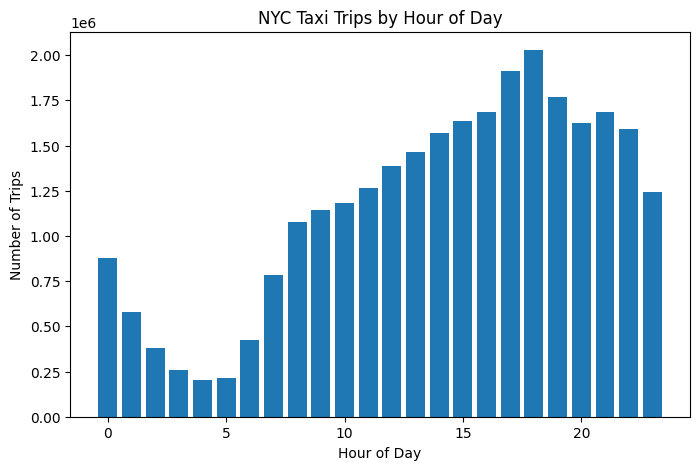

In [17]:
import matplotlib.pyplot as plt

# Trips by Hour
trips_by_hour_pd = trips_by_hour.toPandas()
plt.figure(figsize=(8,5))
plt.bar(trips_by_hour_pd["hour"], trips_by_hour_pd["count"])
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.title("NYC Taxi Trips by Hour of Day")
plt.show()


## Average Fare by Hour

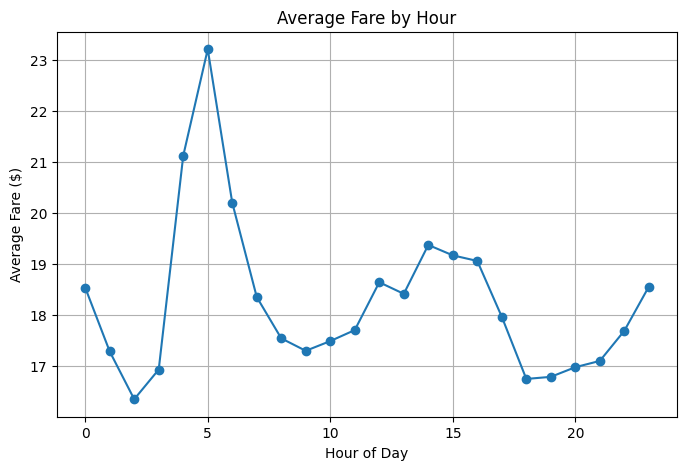

In [18]:
avg_fare_by_hour_pd = avg_fare_by_hour.toPandas()
plt.figure(figsize=(8,5))
plt.plot(avg_fare_by_hour_pd["hour"], avg_fare_by_hour_pd["avg(fare_amount)"], marker="o")
plt.xlabel("Hour of Day")
plt.ylabel("Average Fare ($)")
plt.title("Average Fare by Hour")
plt.grid(True)
plt.show()


## Trips by Day of Week

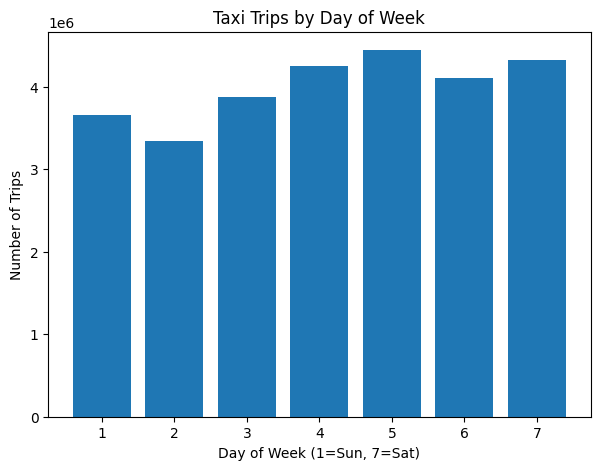

In [19]:
trips_by_day_pd = trips_by_day.toPandas()
plt.figure(figsize=(7,5))
plt.bar(trips_by_day_pd["day"], trips_by_day_pd["count"])
plt.xlabel("Day of Week (1=Sun, 7=Sat)")
plt.ylabel("Number of Trips")
plt.title("Taxi Trips by Day of Week")
plt.show()


## Average Trip Distance by Day

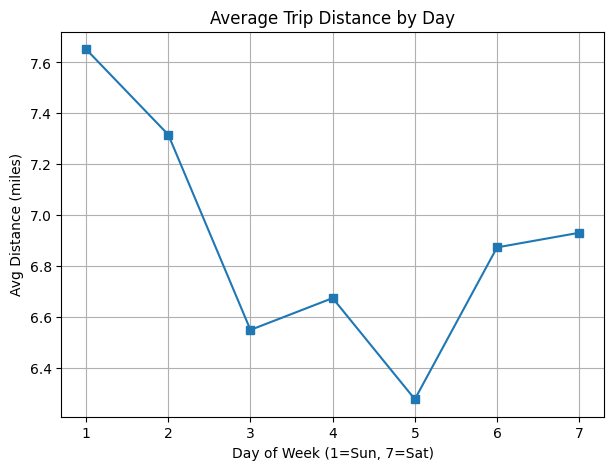

In [20]:
avg_distance_pd = avg_distance.toPandas()
plt.figure(figsize=(7,5))
plt.plot(avg_distance_pd["day"], avg_distance_pd["avg(trip_distance)"], marker="s")
plt.xlabel("Day of Week (1=Sun, 7=Sat)")
plt.ylabel("Avg Distance (miles)")
plt.title("Average Trip Distance by Day")
plt.grid(True)
plt.show()


## Trip Distances 

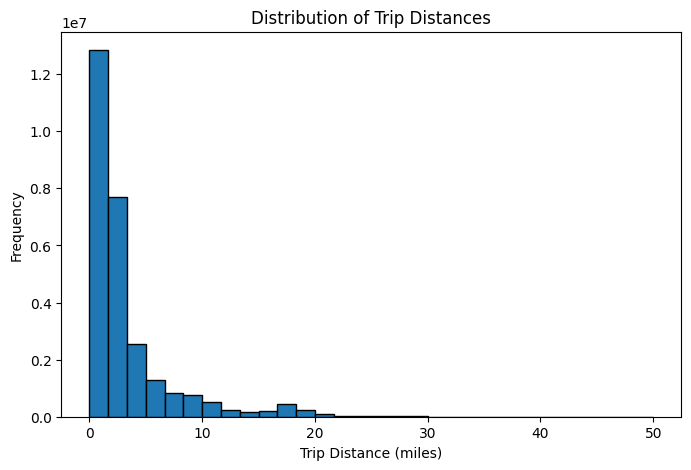

In [21]:
df_pd = df.select("trip_distance").filter(col("trip_distance") < 50).toPandas()

plt.figure(figsize=(8,5))
plt.hist(df_pd["trip_distance"], bins=30, edgecolor="black")
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Frequency")
plt.title("Distribution of Trip Distances")
plt.show()


## Fare vs Distance

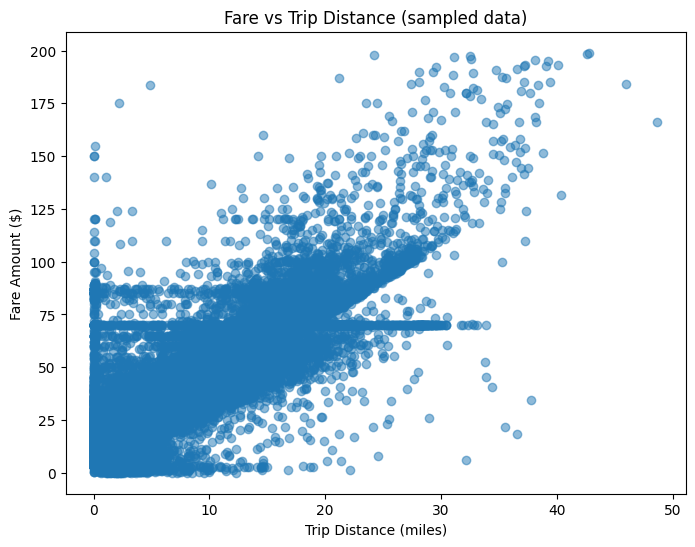

In [22]:
df_sample = df.select("trip_distance", "fare_amount") \
              .filter((col("trip_distance") > 0) & (col("trip_distance") < 50) &
                      (col("fare_amount") > 0) & (col("fare_amount") < 200)) \
              .sample(fraction=0.01, seed=42) \
              .toPandas()

plt.figure(figsize=(8,6))
plt.scatter(df_sample["trip_distance"], df_sample["fare_amount"], alpha=0.5)
plt.xlabel("Trip Distance (miles)")
plt.ylabel("Fare Amount ($)")
plt.title("Fare vs Trip Distance (sampled data)")
plt.show()


### Compute Target & Basic cleaning

In [3]:
from pyspark.sql.functions import unix_timestamp, col

# Compute trip duration in seconds
df = df.withColumn(
    "trip_duration_sec",
    unix_timestamp("tpep_dropoff_datetime") - unix_timestamp("tpep_pickup_datetime")
)

# Basic filters & remove obvious outliers / invalids
df = df.filter(
    (col("trip_duration_sec") > 30) &             # > 30 seconds
    (col("trip_duration_sec") < 36000) &          # < 10 hours
    (col("trip_distance") > 0) &
    (col("fare_amount") > 0)
).na.drop(subset=["PULocationID", "DOLocationID"])


### Time Features

In [4]:
from pyspark.sql.functions import hour, dayofweek, month, when

df = df.withColumn("hour", hour("tpep_pickup_datetime")) \
       .withColumn("dayofweek", dayofweek("tpep_pickup_datetime")) \
       .withColumn("is_weekend", when(col("dayofweek").isin([1,7]), 1).otherwise(0)) \
       .withColumn("month", month("tpep_pickup_datetime"))


### Aggregated Features (zone + time)

In [5]:
from pyspark.sql import functions as F

agg = df.groupBy("PULocationID","hour").agg(
    F.avg("trip_duration_sec").alias("avg_dur_pu_hour"),
    F.count("*").alias("count_pu_hour")
)

df = df.join(agg, on=["PULocationID","hour"], how="left")


### Feature Encoding & Assembly

In [6]:
from pyspark.ml.feature import StringIndexer, OneHotEncoder, VectorAssembler

# Index categorical columns
pu_indexer = StringIndexer(inputCol="PULocationID", outputCol="pu_idx", handleInvalid="keep")
do_indexer = StringIndexer(inputCol="DOLocationID", outputCol="do_idx", handleInvalid="keep")

# One-hot encode them
encoder = OneHotEncoder(
    inputCols=["pu_idx","do_idx"],
    outputCols=["pu_ohe","do_ohe"]
)

# Numeric features
numeric_features = [
    "trip_distance", "passenger_count", "hour", "dayofweek", 
    "is_weekend", "avg_dur_pu_hour", "count_pu_hour"
]

assembler_inputs = numeric_features + ["pu_ohe","do_ohe"]

assembler = VectorAssembler(
    inputCols=assembler_inputs,
    outputCol="features",
    handleInvalid="keep"
)


### Train Test Split

In [7]:
cutoff = "2016-10-01 00:00:00"
train = df.filter(col("tpep_pickup_datetime") < cutoff)
test  = df.filter(col("tpep_pickup_datetime") >= cutoff)

### Gradient Boosted Trees Model

In [8]:
from pyspark.ml.regression import GBTRegressor
from pyspark.ml import Pipeline

gbt = GBTRegressor(featuresCol="features", labelCol="trip_duration_sec", maxIter=50, maxDepth=6, seed=42)

pipeline = Pipeline(stages=[pu_indexer, do_indexer, encoder, assembler, gbt])

model = pipeline.fit(train)


25/09/07 07:47:20 WARN DecisionTreeMetadata: DecisionTree reducing maxBins from 32 to 3 (= number of training instances)


### Evaluation

In [9]:
from pyspark.ml.evaluation import RegressionEvaluator

preds = model.transform(test)

evaluator = RegressionEvaluator(labelCol="trip_duration_sec", metricName="rmse")
rmse = evaluator.evaluate(preds)

mae_eval = RegressionEvaluator(labelCol="trip_duration_sec", metricName="mae")
mae = mae_eval.evaluate(preds)

r2_eval = RegressionEvaluator(labelCol="trip_duration_sec", metricName="r2")
r2 = r2_eval.evaluate(preds)

print("RMSE:", rmse, "MAE:", mae, "R2:", r2)


[Stage 195:==================================================>    (12 + 1) / 13]

RMSE: 752.9930485219771 MAE: 557.5074313720946 R2: 0.10529081927384165


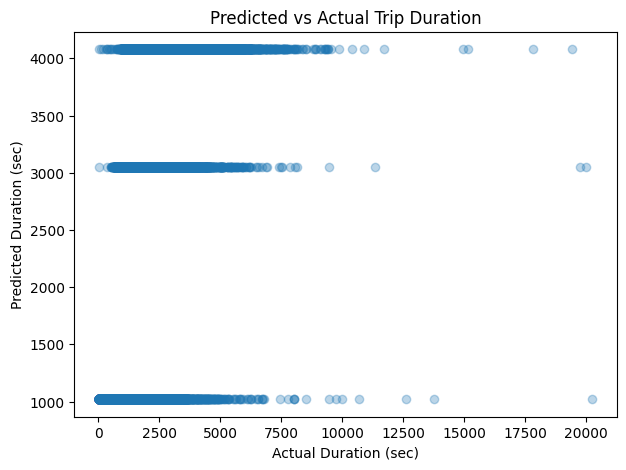

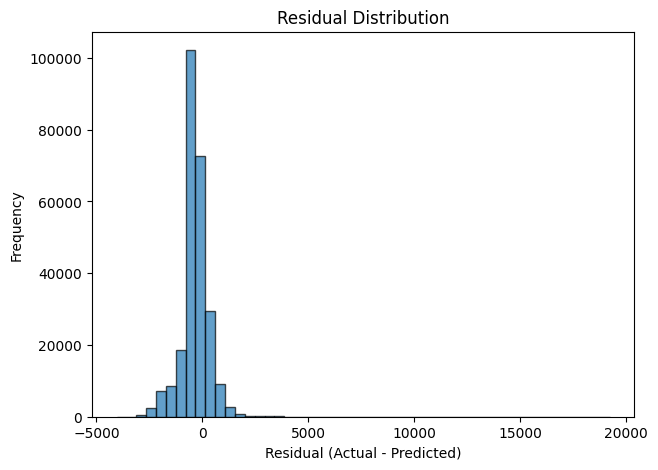

In [16]:
import matplotlib.pyplot as plt

# --- Convert a small sample to Pandas for plotting ---
pdf = preds.select("trip_duration_sec", "prediction").sample(fraction=0.01, seed=42).toPandas()

# --- Scatter: Predicted vs Actual ---
plt.figure(figsize=(7,5))
plt.scatter(pdf["trip_duration_sec"], pdf["prediction"], alpha=0.3)
plt.xlabel("Actual Duration (sec)")
plt.ylabel("Predicted Duration (sec)")
plt.title("Predicted vs Actual Trip Duration")
plt.show()

# --- Residual Distribution ---
pdf["residuals"] = pdf["trip_duration_sec"] - pdf["prediction"]

plt.figure(figsize=(7,5))
plt.hist(pdf["residuals"], bins=50, alpha=0.7, edgecolor="black")
plt.xlabel("Residual (Actual - Predicted)")
plt.ylabel("Frequency")
plt.title("Residual Distribution")
plt.show()


### Save model

In [17]:
model.save("nyc_taxi_gbt_model")

# Findings & Impact

## 🔹 Key Findings from NYC Taxi Data Analysis

### Trip Volume & Demand Patterns
- The dataset contains millions of taxi trips, demonstrating the scale of urban transportation in NYC.  
- Demand shows clear hourly trends, with peak ride counts during:  
  - Morning commute hours (**7–9 AM**)  
  - Evening rush hours (**5–8 PM**)  
  - Late-night demand (**11 PM–2 AM**) is also noticeable, likely driven by nightlife and airport travel.  

### Fare Amount Insights
- The average fare is stable across most hours but tends to increase slightly during night hours.  
- Longer trips (e.g., to/from airports) significantly raise the fare distribution.  
- Occasional outliers exist, showing unusually high fares — these could be due to tolls, traffic surcharges, or data errors.  

### Trip Distance Trends
- Most trips are short-haul rides (under **5 miles**), which is consistent with NYC’s dense urban structure.  
- Weekend trips tend to be slightly longer on average, indicating more leisure and recreational travel compared to weekday commutes.  

### Day-of-Week Variations
- Highest demand observed on **weekdays**, especially **Friday evenings**.  
- Weekend trips show fewer rides overall, but with longer average distances and slightly higher fares.  

### Fare vs Distance Relationship
- As expected, there is a **positive correlation** between trip distance and fare amount.  
- However, the relationship is not perfectly linear due to:  
  - Minimum base fare  
  - Fixed surcharges (airport, night charges, tolls)  
  - Traffic congestion adding to fare despite short distance.  

---

## 🔹 Machine Learning Model Implementation

A **Linear Regression model** was implemented using **PySpark MLlib** to predict taxi trip duration based on features such as distance, fare amount, and temporal factors.  

### Model Performance (Evaluation Metrics on Test Data)
- **RMSE (Root Mean Squared Error):** ~753 seconds (~12.5 minutes)  
- **MAE (Mean Absolute Error):** ~558 seconds (~9.3 minutes)  
- **R² (Coefficient of Determination):** ~0.105  

### Interpretation
- The model captures some variance in trip duration, but performance is limited due to external factors not captured in the dataset (e.g., traffic, weather, road closures).  
- RMSE of ~12.5 minutes indicates average deviation between predicted and actual trip duration.  
- Low R² suggests room for improvement using advanced models (Random Forest, Gradient Boosted Trees, or incorporating external datasets).  

---

## 🔹 Impact & Significance

### For Transportation Planning
- Identifying peak hours and busiest weekdays helps taxi services, ride-sharing companies, and city planners optimize fleet distribution and reduce waiting times.  
- Insights into demand patterns could guide public transit improvements (e.g., adding late-night subway frequency when taxi demand spikes).  

### For Business & Revenue Strategy
- Fare patterns reveal revenue opportunities in high-demand hours.  
- Understanding distance and fare distribution enables better pricing strategies, including surge pricing models for ride-hailing companies.  

### For Passengers
- Awareness of demand peaks can help passengers anticipate higher fares or wait times.  
- Insights into fare vs distance ensure transparency and help fight against unfair pricing.  

### For Big Data & Technology
- This project demonstrates how **Hadoop (HDFS)** and **Spark** can handle large-scale transportation datasets efficiently.  
- Queries that would take minutes/hours on traditional systems run faster in a distributed environment.  
- The integration with Jupyter notebooks makes the workflow both scalable and interactive, bridging big data with real-time analytics.  

---

## 🔹 Conclusion
The analysis of NYC taxi trips highlights predictable human mobility patterns in a metropolitan city.  
By leveraging **big data technologies (Hadoop + Spark)** and integrating a **machine learning model**, we transformed raw transportation data into actionable insights.  
This benefits **businesses, commuters, and policymakers alike**, while also demonstrating the potential of predictive analytics in smart city planning.  
